### TSHIAMO EDWIN DITHATE
### EMPLOYEE TURNOVER ANALYTICS PROJECT

In [82]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
#LOAD THE DATASET
df= pd.read_csv("HR_comma_sep.csv")

In [84]:
#PERFORMING BASIC ANALYSES
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [85]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [87]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [88]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [89]:
df.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [90]:
df["left"].unique()

array([1, 0], dtype=int64)

In [91]:
df["number_project"].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [92]:
df.satisfaction_level.unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [93]:
df.last_evaluation.unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [94]:
df.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [95]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [96]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [97]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]
df_numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [98]:
df_numeric.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

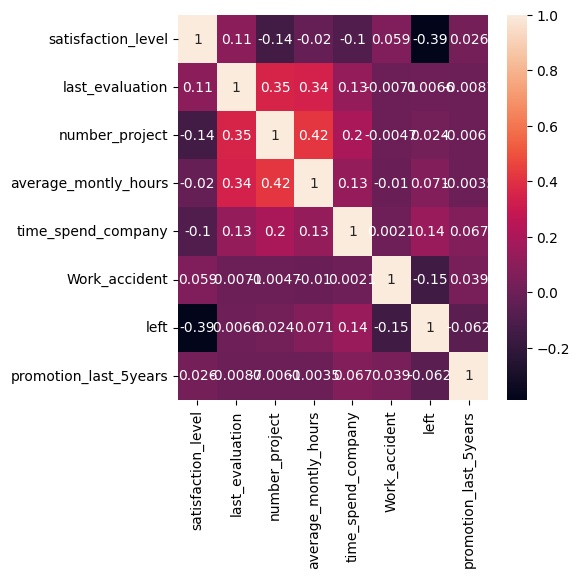

In [99]:
plt.figure(figsize=(5,5))
sns.heatmap(df_numeric.corr(),annot=True)

In [100]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [101]:
df1= df.groupby(["sales"])["left"].value_counts().reset_index(name="count")
df1=pd.DataFrame(df1)
df["sales"].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [102]:
df["sales"].value_counts()

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [103]:
df2=df["sales"].value_counts().reset_index(name="Total")
df2=df2.rename(columns={"index":"sales"})
df2

,sales,Total
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [104]:
dfmer=df1.merge(df2,how="left")
dfmer

,sales,left,count,Total
0,IT,0,954,1227
1,IT,1,273,1227
2,RandD,0,666,787
3,RandD,1,121,787
4,accounting,0,563,767
5,accounting,1,204,767
6,hr,0,524,739
7,hr,1,215,739
8,management,0,539,630
9,management,1,91,630


In [105]:
dfmer["normal"]=dfmer["count"].div(dfmer["Total"].values)
dfmer["normal"]=dfmer["normal"]*100
dfmer

,sales,left,count,Total,normal
0,IT,0,954,1227,77.750611
1,IT,1,273,1227,22.249389
2,RandD,0,666,787,84.625159
3,RandD,1,121,787,15.374841
4,accounting,0,563,767,73.402868
5,accounting,1,204,767,26.597132
6,hr,0,524,739,70.906631
7,hr,1,215,739,29.093369
8,management,0,539,630,85.555556
9,management,1,91,630,14.444444


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

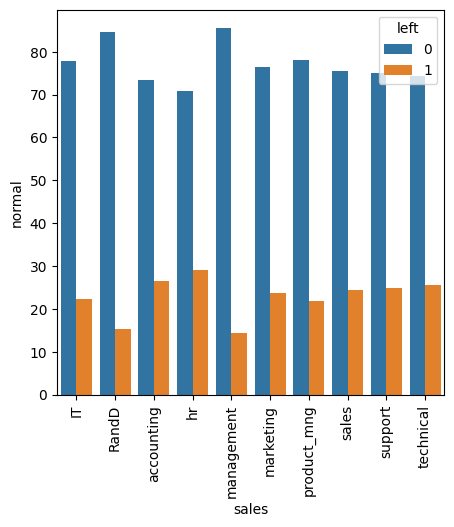

In [106]:
plt.figure(figsize=(5,5))
sns.barplot(x="sales",y='normal',hue="left",data=dfmer)
plt.xticks(rotation=90)

##### Employees from the HR department are leaving the highest based on the normalized data. The HR department has the highest percentage.
###### Normalized = (Count of people from leaving category in a department)/(Total number of people in that department)*100

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

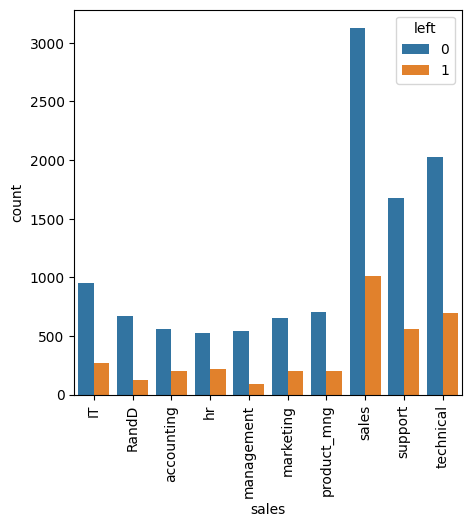

In [107]:
# SALES
plt.figure(figsize=(5,5))
sns.barplot(x="sales",y='count',hue="left",data=df1)
plt.xticks(rotation=90)

#### The department with the highest employee turnover, based solely on the number of departures, is sales.

In [108]:
df2= df.groupby(["salary"])["left"].value_counts().reset_index(name="count")
df2=pd.DataFrame(df2)
df2

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


([0, 1, 2], [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

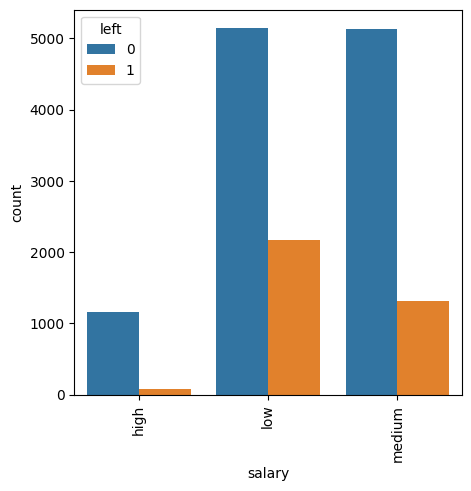

In [109]:
# SALARY
plt.figure(figsize=(5,5))
sns.barplot(x="salary",y='count',hue="left",data=df2)
plt.xticks(rotation=90)

#### The plot above shows that Workers receiving lower salaries are departing from the company.

In [110]:
df3= df.groupby(["time_spend_company"])["left"].value_counts().reset_index(name="count")
df3=pd.DataFrame(df3)

In [111]:
df3.head()

,time_spend_company,left,count
0,2,0,3191
1,2,1,53
2,3,0,4857
3,3,1,1586
4,4,0,1667


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '10')])

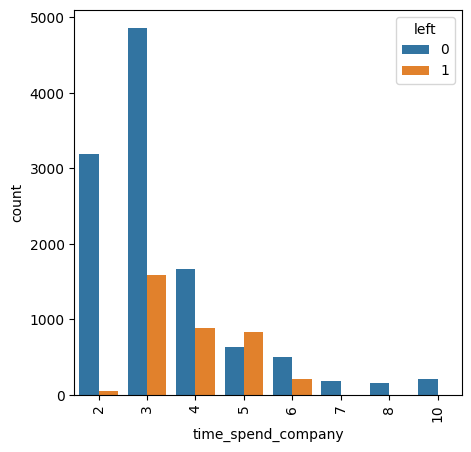

In [112]:
plt.figure(figsize=(5,5))
sns.barplot(x="time_spend_company",y='count',hue="left",data=df3)
plt.xticks(rotation=90)

#### The chart above indicates that individuals with 3 to 5 years of experience are departing from the company at a higher rate.

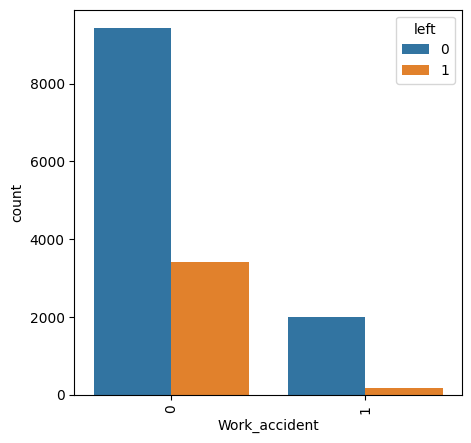

In [113]:
plt.figure(figsize=(5, 5))
sns.countplot(x="Work_accident", hue="left", data=df)
plt.xticks(rotation=90)
plt.show()

In [114]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

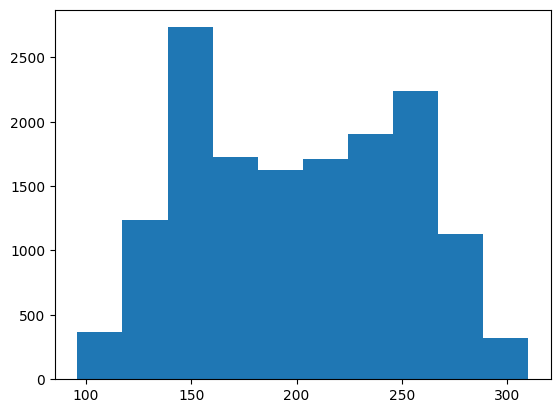

In [115]:
plt.hist(df["average_montly_hours"])

<Axes: xlabel='average_montly_hours', ylabel='Count'>

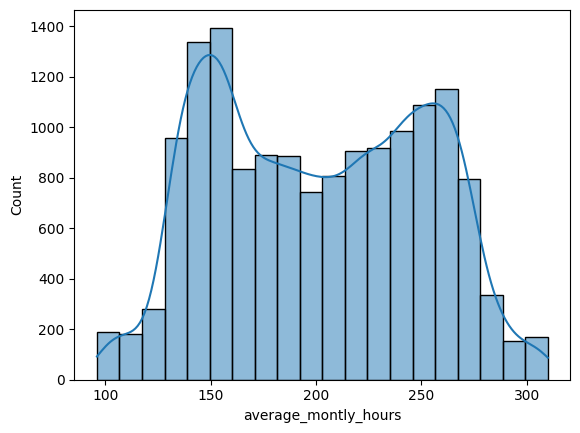

In [116]:
sns.histplot(data = df,x="average_montly_hours", kde = True,bins=20)

<Axes: xlabel='satisfaction_level', ylabel='Count'>

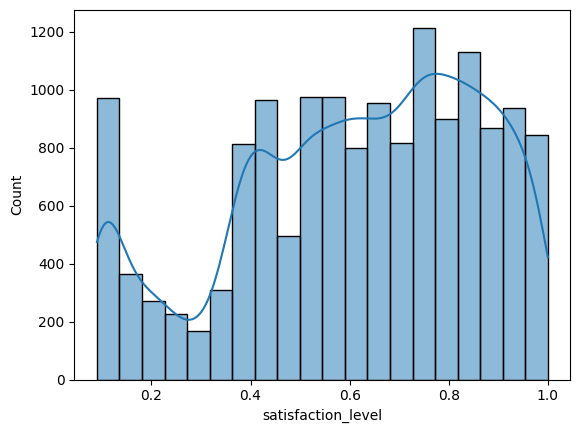

In [117]:
sns.histplot(data = df,x="satisfaction_level", kde = True,bins=20)

<Axes: xlabel='last_evaluation', ylabel='Count'>

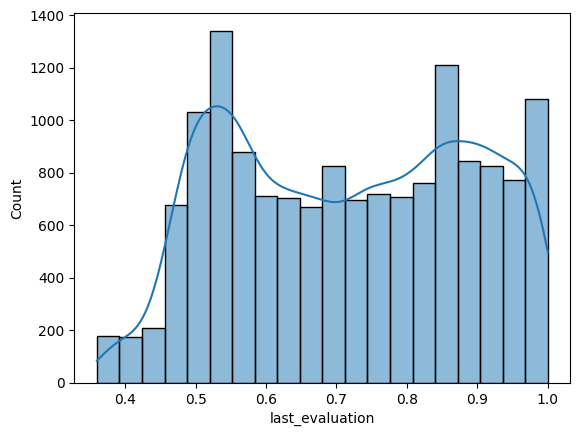

In [118]:
sns.histplot(data = df,x="last_evaluation", kde = True,bins=20)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7')])

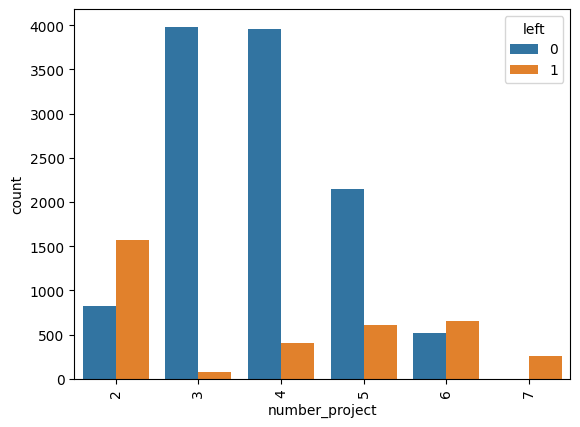

In [119]:
sns.countplot(x="number_project",hue="left",data=df)
plt.xticks(rotation=90)

#### The graph above indicates that individuals who have worked on 3 or 4 projects have departed from the organization more frequently.

In [120]:
dfcluster = df[["satisfaction_level","last_evaluation","left"]]

In [121]:
dfcluster

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [122]:
km=dfcluster.iloc[:,:].values
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(dfcluster)
labelarr = kmeans.fit_predict(km)

In [123]:
label

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
dfcluster[label==0].describe()

,satisfaction_level,last_evaluation,left
count,4596.000000,4596.000000,4596.0
mean,0.453814,0.679569,0.0
std,0.152887,0.165613,0.0
min,0.120000,0.360000,0.0
25%,0.340000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [125]:
dfcluster[label==1].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


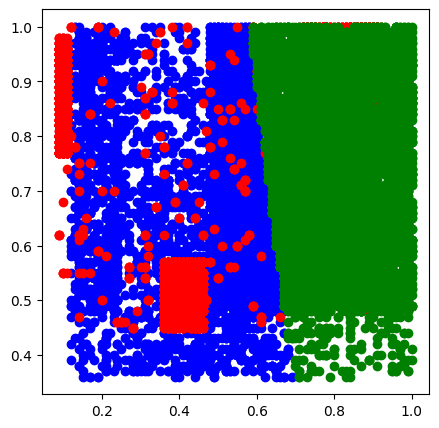

In [126]:
km[label==0,1]
plt.figure(figsize=(5,5))
plt.scatter(km[label==0,0],km[label==0,1],color="blue")
plt.scatter(km[label==1,0],km[label==1,1],color="red")
plt.scatter(km[label==2,0],km[label==2,1],color="green")

#### The Blue cluster represents individuals with the highest satisfaction levels and high scores in the last evaluation.

#### The Red cluster represents individuals with moderate satisfaction levels and average to high scores in the last evaluation.

#### The Green cluster represents individuals with lower satisfaction levels and scores that are somewhat lower compared to the clusters mentioned above.

In [127]:
df_numerical=df.select_dtypes(include=['int64','float64'])
df_categorical=df.select_dtypes(include=['object'])

In [128]:
df_converted = pd.get_dummies(data=df_categorical, dtype="int")
df_converted.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [129]:
dfn = pd.concat([df_numerical, df_converted], axis=1, join="inner")
dfn.shape

(14999, 21)

In [130]:
dfn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [131]:
#SEPARATE X AND y
x =dfn.drop("left",axis=1)
y = dfn["left"]

In [132]:
#TRAIN_TEST_SPLIT
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [133]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((11999, 20), (11999,), (3000, 20), (3000,))

In [134]:
ytrain.value_counts()

left
0    9137
1    2862
Name: count, dtype: int64

#### Data is highly imbalanced for the training dataset, I'm using SMOTE to handle the imbalance for the left category

In [135]:
sm = SMOTE(random_state = 2)
xtrainres, ytrainres = sm.fit_resample(xtrain, ytrain)
ytrainres.value_counts()

left
0    9137
1    9137
Name: count, dtype: int64

### LOGISTIC REGRESSION MODEL

In [136]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
print(cross_val_score(logreg, xtrainres, ytrainres, cv=5).mean())

0.8060101067959928


In [137]:
# FIT THE MODEL
logreg.fit(xtrainres,ytrainres)

LogisticRegression(max_iter=10000)

In [138]:
# PREDICT USING THE MODEL
ypred = logreg.predict(xtest)

In [139]:
metrics.confusion_matrix(ytest,ypred)

array([[1831,  460],
       [ 228,  481]], dtype=int64)

In [140]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [141]:
roc_auc_score(ytest,ypred)

0.7388173135941893

[0.         0.20078568 1.        ]
[0.         0.67842031 1.        ]
[inf  1.  0.]
0.7388173135941893


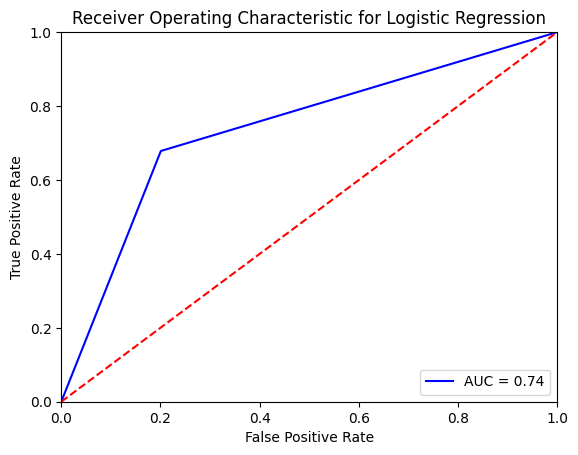

In [142]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RANDOM FOREST CLASSIFIER 

In [143]:
random=RandomForestClassifier(max_depth=5)
print(cross_val_score(random, xtrainres, ytrainres, cv=5).mean())

0.9490534818578593


In [144]:
#FIT THE MODEL
random.fit(xtrainres,ytrainres)

RandomForestClassifier(max_depth=5)

In [145]:
# PREDICT USING THE MODEL
ypred1=random.predict(xtest)

In [146]:
metrics.confusion_matrix(ytest,ypred1)

array([[2226,   65],
       [  60,  649]], dtype=int64)

In [147]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2291
           1       0.91      0.92      0.91       709

    accuracy                           0.96      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [148]:
roc_auc_score(ytest,ypred1)

0.943500937931527

[0.         0.02837189 1.        ]
[0.         0.91537377 1.        ]
[inf  1.  0.]
0.943500937931527


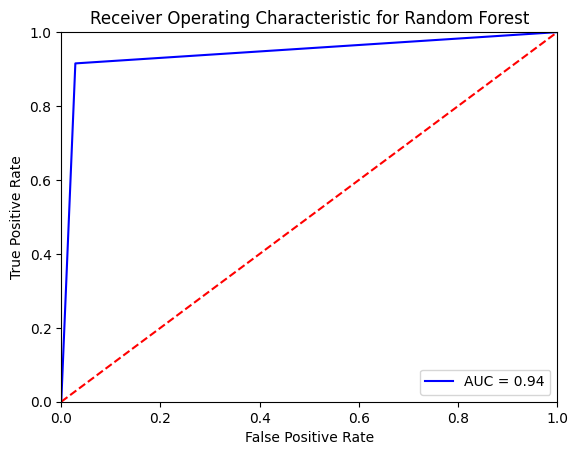

In [149]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred1)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)


plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### GRADIENT BOOSTING CLASSIFIER

In [150]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
print(cross_val_score(gb, xtrainres, ytrainres, cv=5).mean())

0.9478495915875037


In [151]:
#FIT THE MODEL
gb.fit(xtrainres,ytrainres)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [152]:
#PREDICT USING THE MODEL
ypred2 = gb.predict(xtest)

In [153]:
metrics.confusion_matrix(ytest,ypred2)

array([[2171,  120],
       [  46,  663]], dtype=int64)

In [154]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2291
           1       0.85      0.94      0.89       709

    accuracy                           0.94      3000
   macro avg       0.91      0.94      0.93      3000
weighted avg       0.95      0.94      0.95      3000



In [155]:
roc_auc_score(ytest,ypred2)

0.9413705066554046

[0.         0.05237887 1.        ]
[0.         0.93511989 1.        ]
[inf  1.  0.]
0.9413705066554046


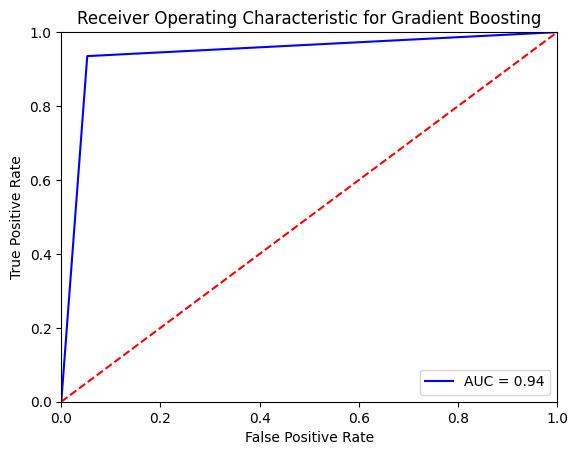

In [156]:
fpr, tpr, threshold = metrics.roc_curve(ytest, ypred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic for Gradient Boosting')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Based on the confusion matrix, the false negatives should be low because if an employee who might leave the organisation is misclassified as someone who won't leave then proper strategies to retain that person will not be implemented on him or her. Hence Recall is a better metric to be utilized

In [157]:
col = xtrainres.columns
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

## Random Forest shows the highest accuracy with good f1 score, we will conclude that to be our best performing model. 

In [159]:
feature_labels = np.array(col)

importance = random.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

sales_hr-0.01%
sales_accounting-0.01%
sales_support-0.01%
sales_marketing-0.02%
sales_technical-0.02%
sales_sales-0.03%
sales_product_mng-0.03%
sales_IT-0.04%
promotion_last_5years-0.14%
sales_RandD-0.18%
sales_management-0.19%
salary_medium-0.20%
salary_low-0.61%
salary_high-1.56%
Work_accident-3.09%
last_evaluation-11.88%
average_montly_hours-12.56%
number_project-17.81%
time_spend_company-23.04%
satisfaction_level-28.56%


#### The above lists the factors that influences the turnover in the ascending order. It can be identified that the employee turnover is highly influenced by the employee's satisfaction level in the organisation. 

### Enhancing the workplace culture within the organization is an excellent strategy for retaining employees.